<a href="https://colab.research.google.com/github/afra16181falakh/spotify-song-classifier/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"afrafalakh","key":"890378513ac546e279197a7690bceb8c"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:

!kaggle datasets download -d zaheenhamidani/ultimate-spotify-tracks-db

Dataset URL: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db
License(s): unknown
  0% 0.00/15.5M [00:00<?, ?B/s]
100% 15.5M/15.5M [00:00<00:00, 1.14GB/s]


In [5]:
!unzip ultimate-spotify-tracks-db.zip

Archive:  ultimate-spotify-tracks-db.zip
  inflating: SpotifyFeatures.csv     


In [6]:
!ls

sample_data  SpotifyFeatures.csv  ultimate-spotify-tracks-db.zip


In [7]:
import pandas as pd

df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [8]:
import pandas as pd

df = pd.read_csv('SpotifyFeatures.csv')
print(df.shape)   # number of rows & columns
df.info()         # data types, nulls
df.describe()     # numerical summary
df.head()

(232725, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_si

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
# Missing values
df.isnull().sum().sort_values(ascending=False).head(10)

# Duplicates
df.duplicated(subset=['track_id']).sum()

# Drop duplicates if any
df = df.drop_duplicates(subset=['track_id'])

In [10]:
df['duration_min'] = df['duration_ms'] / 60000

In [11]:
df['genre'] = df['genre'].str.strip().str.title()
df['mode'] = df['mode'].map({'Major': 1, 'Minor': 0})

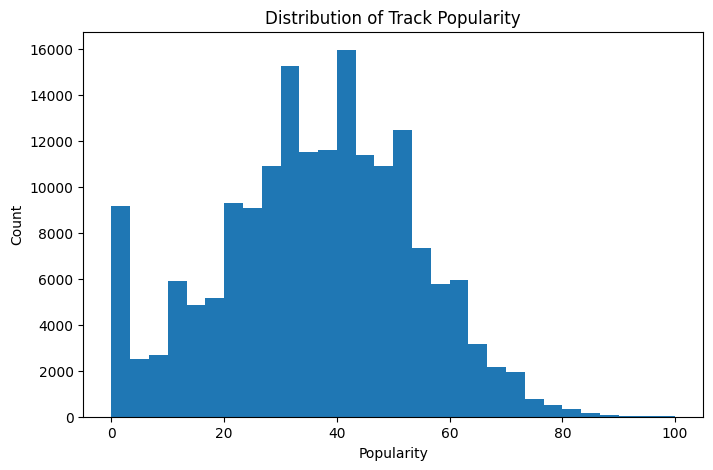

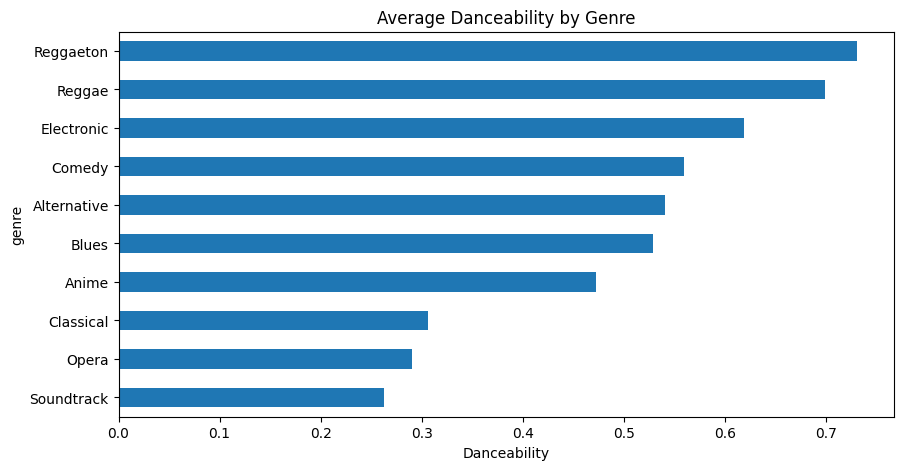

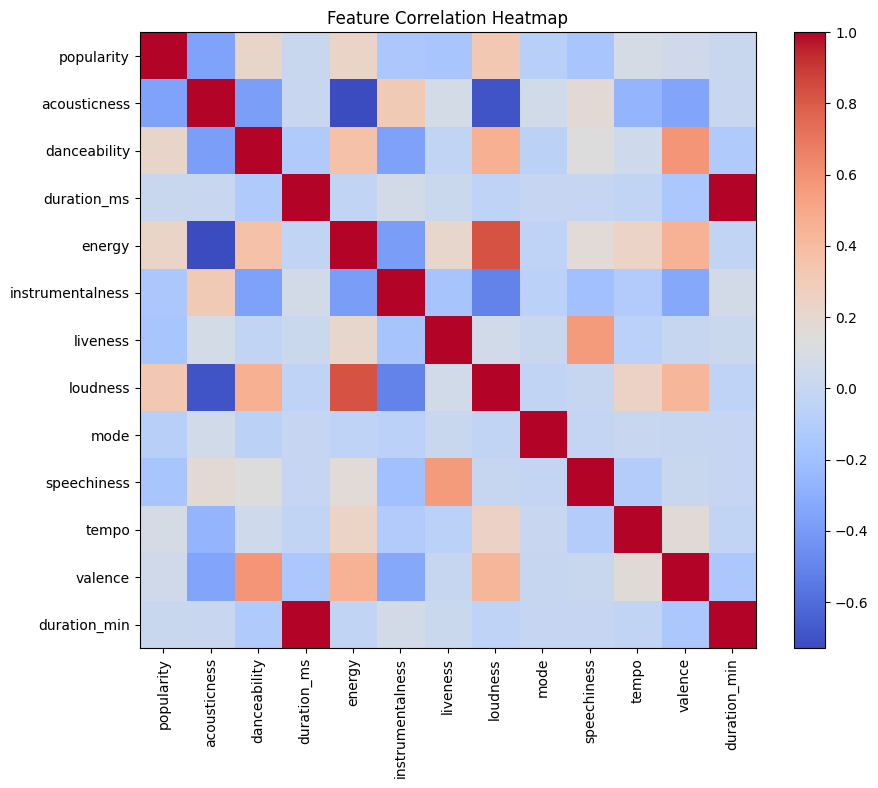

In [12]:
import matplotlib.pyplot as plt

# 1️⃣ Distribution of popularity
plt.figure(figsize=(8,5))
plt.hist(df['popularity'], bins=30)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# 2️⃣ Average danceability by genre (top 10)
top_genres = df['genre'].value_counts().nlargest(10).index
avg_dance = df[df['genre'].isin(top_genres)].groupby('genre')['danceability'].mean().sort_values()

plt.figure(figsize=(10,5))
avg_dance.plot(kind='barh')
plt.title('Average Danceability by Genre')
plt.xlabel('Danceability')
plt.show()

# 3️⃣ Correlation heatmap
import numpy as np

corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Feature Correlation Heatmap')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

In [13]:
# Average features per genre
genre_summary = df.groupby('genre')[['energy', 'danceability', 'valence']].mean().sort_values('energy', ascending=False)
genre_summary.head(10)

,energy,danceability,valence
genre,,,
Ska,0.836923,0.510686,0.647291
Reggaeton,0.748457,0.730253,0.659990
Electronic,0.739263,0.619128,0.385348
Alternative,0.713933,0.541132,0.448935
Children’S Music,0.712646,0.525066,0.438589
Dance,0.696151,0.641974,0.517666
Comedy,0.676169,0.559011,0.412648
Rock,0.674699,0.520476,0.513840
Anime,0.665320,0.472091,0.441682


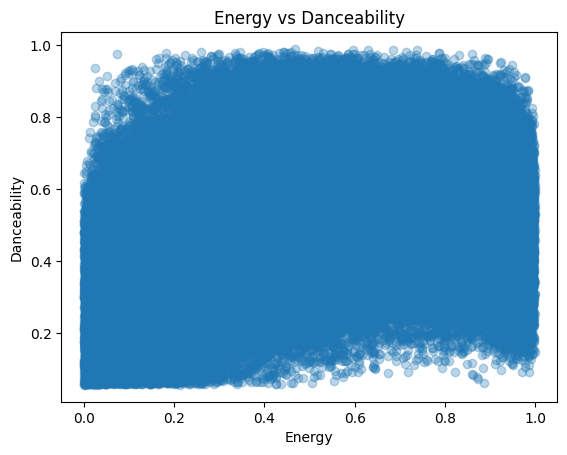

In [14]:
plt.scatter(df['energy'], df['danceability'], alpha=0.3)
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

In [15]:
df.to_csv('SpotifyFeatures_cleaned.csv', index=False)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('SpotifyFeatures.csv')

# Step 1: Create a binary target variable
df['popular_label'] = (df['popularity'] > 50).astype(int)  # 1 if popularity > 50

# Step 2: Select useful numerical columns
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]
y = df['popular_label']

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((186180, 9), (46545, 9))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create the model
log_model = LogisticRegression(max_iter=1000)

# Step 2: Train (fit) the model on training data
log_model.fit(X_train, y_train)

# Step 3: Make predictions on test data
y_pred = log_model.predict(X_test)

# Step 4: Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6902352562036739

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78     30593
           1       0.57      0.37      0.45     15952

    accuracy                           0.69     46545
   macro avg       0.65      0.61      0.62     46545
weighted avg       0.67      0.69      0.67     46545


Confusion Matrix:
 [[26185  4408]
 [10010  5942]]


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8753894080996885

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     30593
           1       0.85      0.77      0.81     15952

    accuracy                           0.88     46545
   macro avg       0.87      0.85      0.86     46545
weighted avg       0.87      0.88      0.87     46545


Confusion Matrix:
 [[28383  2210]
 [ 3590 12362]]


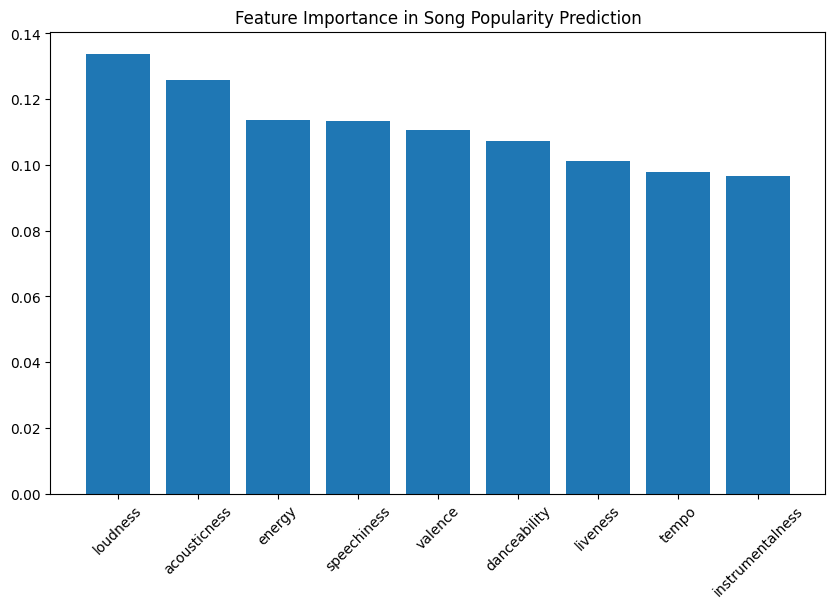

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance in Song Popularity Prediction")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.show()